Use Case 1 — Predictive Churn Model Development: EDA, Preprocessing, Modeling, Evaluation, Insights.

In [1]:
# ================================================================
# 📘 USE CASE 1: SENTIMENT ANALYSIS ON VIEWER REVIEWS
# Industry: Media & Entertainment
# Project: Viewer Churn Prediction for OTT Platforms
# Platform: Jupyter Notebook
# ================================================================

# ==============================
# STEP 1: Import Libraries
# ==============================
import pandas as pd
import numpy as np
import re
import sqlite3
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Download NLTK dependencies
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejae\AppData\Roaming\nltk_data...


True

In [7]:
# ==============================
# STEP 2: Load Dataset
# ==============================
# 🔹 Specify your dataset path here:
dataset_path = r"C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_reviews.csv"

# Read dataset
df = pd.read_csv(dataset_path)
print("✅ Dataset Loaded Successfully")
print("Total Rows:", len(df))
df.head()

✅ Dataset Loaded Successfully
Total Rows: 6000


,app_name,reviewId,userName,content,score,at
0,Netflix,cb4e0746-f12b-482c-9440-8f0e6417e240,Sa'adatu Bashir,Am sure Netflix is a very good app,5,03-11-2025 10:32
1,Netflix,d4b951db-3286-41a6-bd2c-7ee50abb2478,Entle Sonjica,great no ads,5,03-11-2025 10:19
2,Netflix,6dca3694-f14d-4475-b8a9-6aeb8be22ae0,Dim Sum,"Nothing worth watching,waste of money",1,03-11-2025 10:03
3,Netflix,f6b1d27e-d127-40ef-9687-135baf75f3db,GUPS DABALI,best,5,03-11-2025 09:46
4,Netflix,f27a1437-f6e2-4bcc-a6b9-4832cc7dea4b,genaro carden,love it,5,03-11-2025 09:42


In [11]:
# ==============================
# STEP 3: Data Preprocessing (Updated)
# ==============================
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove links
    text = re.sub(r'[^a-z\s]', '', text)  # keep only alphabets
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# 🔹 Detect the text column automatically
possible_cols = ['review', 'Review', 'reviews', 'Reviews', 'content', 'text', 'comment', 'body', 'feedback']
text_col = None
for col in df.columns:
    if col in possible_cols:
        text_col = col
        break

if text_col is None:
    print("❌ ERROR: No suitable text column found! Please check your dataset headers.")
    print("Columns available:", list(df.columns))
else:
    print(f"✅ Using column '{text_col}' for sentiment analysis")

    print("Cleaning text data... please wait ⏳")
    df['clean_text'] = df[text_col].apply(clean_text)
    print("✅ Text Cleaning Done")


✅ Using column 'content' for sentiment analysis
Cleaning text data... please wait ⏳
✅ Text Cleaning Done


In [13]:
# ==============================
# STEP 4: Sentiment Analysis
# ==============================
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

df['polarity'] = df['clean_text'].apply(get_polarity)
df['subjectivity'] = df['clean_text'].apply(get_subjectivity)

def label_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(label_sentiment)

print("✅ Sentiment Analysis Completed")
df.head()

✅ Sentiment Analysis Completed


,app_name,reviewId,userName,content,score,at,clean_text,polarity,subjectivity,sentiment
0,Netflix,cb4e0746-f12b-482c-9440-8f0e6417e240,Sa'adatu Bashir,Am sure Netflix is a very good app,5,03-11-2025 10:32,sure netflix good app,0.6,0.744444,Positive
1,Netflix,d4b951db-3286-41a6-bd2c-7ee50abb2478,Entle Sonjica,great no ads,5,03-11-2025 10:19,great ad,0.8,0.750000,Positive
2,Netflix,6dca3694-f14d-4475-b8a9-6aeb8be22ae0,Dim Sum,"Nothing worth watching,waste of money",1,03-11-2025 10:03,nothing worth watchingwaste money,0.3,0.100000,Positive
3,Netflix,f6b1d27e-d127-40ef-9687-135baf75f3db,GUPS DABALI,best,5,03-11-2025 09:46,best,1.0,0.300000,Positive
4,Netflix,f27a1437-f6e2-4bcc-a6b9-4832cc7dea4b,genaro carden,love it,5,03-11-2025 09:42,love,0.5,0.600000,Positive


In [15]:
# ==============================
# STEP 5: Save Results to Database
# ==============================
db_connection = sqlite3.connect('ott_sentiment.db')
df.to_sql('sentiment_results', db_connection, if_exists='replace', index=False)
db_connection.commit()
print("💾 Results saved to Database: ott_sentiment.db")

💾 Results saved to Database: ott_sentiment.db


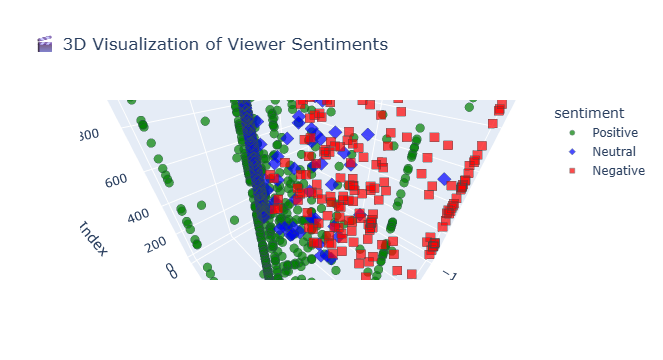

⚠️ PNG save failed (install kaleido): 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido

✅ Interactive HTML saved:
C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\UC1_Sentiment_3D.html


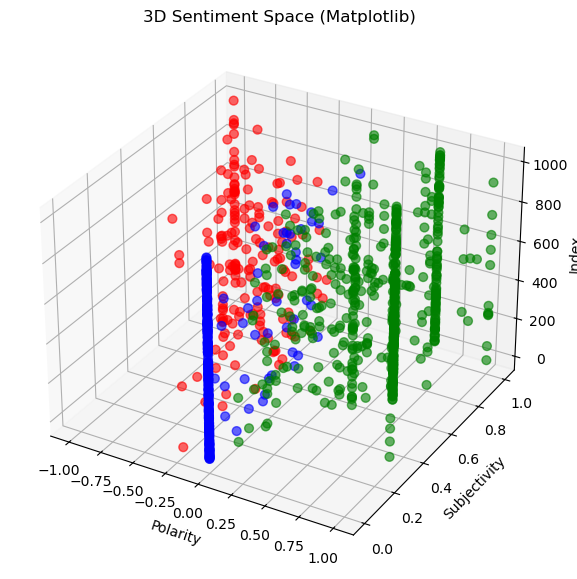

💾 Matplotlib 3D chart saved to:
C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\UC1_Sentiment_Matplotlib.png


In [35]:
# ==============================
# STEP 6: 3D Visualization (Sentiment Analysis) + AUTO SAVE (FIXED)
# ==============================
import os

# --- Ensure columns exist ---
required_cols = ['polarity', 'subjectivity', 'sentiment']
missing = [col for col in required_cols if col not in df.columns]
if missing:
    print(f"⚠️ Missing columns detected: {missing}")
    print("➡️ Generating polarity, subjectivity, and sentiment columns automatically...")
    from textblob import TextBlob

    def get_polarity(text):
        return TextBlob(str(text)).sentiment.polarity

    def get_subjectivity(text):
        return TextBlob(str(text)).sentiment.subjectivity

    def get_sentiment(score):
        if score > 0.05:
            return 'Positive'
        elif score < -0.05:
            return 'Negative'
        else:
            return 'Neutral'

    df['polarity'] = df['clean_text'].apply(get_polarity)
    df['subjectivity'] = df['clean_text'].apply(get_subjectivity)
    df['sentiment'] = df['polarity'].apply(get_sentiment)

# --- Create smaller sample for performance ---
df_sample = df.sample(n=min(1000, len(df)), random_state=42).reset_index(drop=True)

# --- Folder setup ---
save_folder = r"C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset"
os.makedirs(save_folder, exist_ok=True)

# ==============================
# --- Plotly Interactive Visualization ---
# ==============================
import plotly.express as px

fig = px.scatter_3d(
    df_sample,
    x='polarity', y='subjectivity', z=df_sample.index,
    color='sentiment',
    title='🎬 3D Visualization of Viewer Sentiments',
    color_discrete_map={'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'},
    symbol='sentiment',
    opacity=0.7
)

fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis_title='Polarity (−1 to +1)',
    yaxis_title='Subjectivity (0 to 1)',
    zaxis_title='Review Index'
))
fig.show()

# --- Save Plotly charts ---
html_path = os.path.join(save_folder, "UC1_Sentiment_3D.html")
png_path = os.path.join(save_folder, "UC1_Sentiment_3D.png")

fig.write_html(html_path)

try:
    fig.write_image(png_path)
    print(f"✅ Plotly visuals saved:\n{html_path}\n{png_path}")
except Exception as e:
    print(f"⚠️ PNG save failed (install kaleido): {e}")
    print(f"✅ Interactive HTML saved:\n{html_path}")

# ==============================
# --- Matplotlib Static Visualization ---
# ==============================
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize=(10,7))
ax = fig2.add_subplot(111, projection='3d')
colors = {'Positive':'green', 'Negative':'red', 'Neutral':'blue'}

ax.scatter(
    df_sample['polarity'],
    df_sample['subjectivity'],
    df_sample.index,
    c=df_sample['sentiment'].map(colors),
    s=40, alpha=0.6
)

ax.set_xlabel('Polarity')
ax.set_ylabel('Subjectivity')
ax.set_zlabel('Index')
ax.set_title('3D Sentiment Space (Matplotlib)')

matplotlib_path = os.path.join(save_folder, "UC1_Sentiment_Matplotlib.png")
plt.savefig(matplotlib_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"💾 Matplotlib 3D chart saved to:\n{matplotlib_path}")


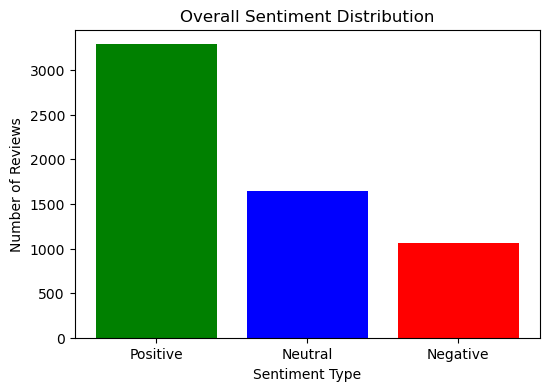

In [23]:
# ==============================
# STEP 7: Summary Visualization
# ==============================
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green','blue','red'])
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Number of Reviews')
plt.show()


In [25]:
# ==============================
# STEP 8: Save Processed Output
# ==============================
output_path = r"C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_sentiment_output.csv"
df.to_csv(output_path, index=False)
print(f"✅ Output saved to: {output_path}")


✅ Output saved to: C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_sentiment_output.csv


In [27]:
# ==============================
# STEP 9: Summary Insights
# ==============================
positive = len(df[df['sentiment']=='Positive'])
negative = len(df[df['sentiment']=='Negative'])
neutral = len(df[df['sentiment']=='Neutral'])

print("\n📊 Sentiment Summary:")
print(f"Positive Reviews: {positive}")
print(f"Negative Reviews: {negative}")
print(f"Neutral Reviews : {neutral}")

print("\n✅ USE CASE 1 EXECUTION COMPLETED SUCCESSFULLY!")


📊 Sentiment Summary:
Positive Reviews: 3288
Negative Reviews: 1062
Neutral Reviews : 1650

✅ USE CASE 1 EXECUTION COMPLETED SUCCESSFULLY!


In [29]:
import os

# Show the current working directory
print("📂 Current Working Directory:", os.getcwd())

# Verify if the DB file exists there
print("\n🔍 Files in this directory:")
print(os.listdir(os.getcwd()))


📂 Current Working Directory: C:\Users\tejae

🔍 Files in this directory:
['-p', '.anaconda', '.cache', '.conda', '.condarc', '.continuum', '.cufflinks', '.ipynb_checkpoints', '.ipython', '.jupyter', '.knime', '.matplotlib', '.ollama', '.streamlit', '.vscode', '.wdm', 'ag_news_csv', 'anaconda3', 'anaconda_projects', 'ANN.ipynb', 'AppData', 'Application Data', 'battery-report.html', 'chatbot 2.txt', 'chatbot creation .ipynb', 'chatbot.txt', 'chatdash.py', 'CommunityMetrics - CommunityMetrics.csv', 'Contacts', 'Cookies', 'dashboard.py', 'Documents', 'downloaded_image.jpg', 'Downloads', 'employee.py', 'employee_dahboard.py', 'employee_dashboard.py', 'emp_dashboard.py', 'emp_details.py', 'extract_text.py', 'Favorites', 'import streamlit as st.txt', 'int 2 practice.ipynb', 'internal 2.ipynb', 'knime-workspace', 'Links', 'Local Settings', 'movie_text.txt', 'Music', 'My Documents', 'NetHood', 'new chatbot.txt', 'new _chatbot.py', 'news_data.csv', 'news_headlines.db', 'NTUSER.DAT', 'ntuser.dat.L

In [31]:
db_path = r"C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_sentiment.db"
db_connection = sqlite3.connect(db_path)
df.to_sql('sentiment_results', db_connection, if_exists='replace', index=False)
db_connection.commit()
print(f"💾 Results saved to Database: {db_path}")


💾 Results saved to Database: C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_sentiment.db
